In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score,accuracy_score

import tensorflow
import keras
from keras.models import Sequential
from keras.layers import InputLayer,Dense
from keras.optimizers import SGD


import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\deepa\Downloads\csv files\Movie_classification.csv")
data

Marketing expense  Production expense  Multiplex coverage     Budget  \
0              20.1264               59.62               0.462  36524.125   
1              20.5462               69.14               0.531  35668.655   
2              20.5458               69.14               0.531  39912.675   
3              20.6474               59.36               0.542  38873.890   
4              21.3810               59.36               0.542  39701.585   
..                 ...                 ...                 ...        ...   
501            21.2526               78.86               0.427  36624.115   
502            20.9054               78.86               0.427  33996.600   
503            21.2152               78.86               0.427  38751.680   
504            22.1918               78.86               0.427  37740.670   
505            20.9482               78.86               0.427  33496.650   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0           138.7               7.825                8.095            7.910   
1           152.4               7.505                7.650            7.440   
2           134.6               7.485                7.570            7.495   
3           119.3               6.895                7.035            6.920   
4           127.7               6.920                7.070            6.815   
..            ...                 ...                  ...              ...   
501         142.6               8.680                8.775            8.620   
502         150.2               8.780                8.945            8.770   
503         164.5               8.830                8.970            8.855   
504         162.8               8.730                8.845            8.800   
505         154.3               8.640                8.880            8.680   

     Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0              7.995           7.94         527367          YES      109.60   
1              7.470           7.44         494055           NO      146.64   
2              7.515           7.44         547051           NO      147.88   
3              7.020           8.26         516279          YES      185.36   
4              7.070           8.26         531448           NO      176.48   
..               ...            ...            ...          ...         ...   
501            8.970           6.80         492480           NO      186.96   
502            8.930           7.80         482875          YES      132.24   
503            9.010           7.80         532239           NO      109.56   
504            8.845           6.80         496077          YES      158.80   
505            8.790           6.80         518438          YES      205.60   

     Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  \
0            223.840  Thriller              23            494       48000   
1            243.456     Drama              42            462       43200   
2           2022.400    Comedy              38            458       69400   
3            225.344     Drama              45            472       66800   
4            225.792     Drama              55            395       72400   
..               ...       ...             ...            ...         ...   
501          243.584    Action              27            561       44800   
502          263.296    Action              20            600       41200   
503          243.824    Comedy              31            576       47800   
504          303.520    Comedy              47            607       44000   
505          203.040    Comedy              45            604       38000   

     Start_Tech_Oscar  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  
..                ...  
501                 0  
502                 0  
503                 0  
504              

In [3]:
data.head()

Marketing expense  Production expense  Multiplex coverage     Budget  \
0            20.1264               59.62               0.462  36524.125   
1            20.5462               69.14               0.531  35668.655   
2            20.5458               69.14               0.531  39912.675   
3            20.6474               59.36               0.542  38873.890   
4            21.3810               59.36               0.542  39701.585   

   Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0         138.7               7.825                8.095            7.910   
1         152.4               7.505                7.650            7.440   
2         134.6               7.485                7.570            7.495   
3         119.3               6.895                7.035            6.920   
4         127.7               6.920                7.070            6.815   

   Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0            7.995           7.94         527367          YES      109.60   
1            7.470           7.44         494055           NO      146.64   
2            7.515           7.44         547051           NO      147.88   
3            7.020           8.26         516279          YES      185.36   
4            7.070           8.26         531448           NO      176.48   

   Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  \
0          223.840  Thriller              23            494       48000   
1          243.456     Drama              42            462       43200   
2         2022.400    Comedy              38            458       69400   
3          225.344     Drama              45            472       66800   
4          225.792     Drama              55            395       72400   

   Start_Tech_Oscar  
0                 1  
1                 0  
2                 1  
3                 1  
4                 1

In [4]:
data.shape

(506, 19)

In [5]:
data.columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       '3D_available', 'Time_taken', 'Twitter_hastags', 'Genre',
       'Avg_age_actors', 'Num_multiplex', 'Collection', 'Start_Tech_Oscar'],
      dtype='object')

In [6]:
data.dtypes

Marketing expense      float64
Production expense     float64
Multiplex coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
3D_available            object
Time_taken             float64
Twitter_hastags        float64
Genre                   object
Avg_age_actors           int64
Num_multiplex            int64
Collection               int64
Start_Tech_Oscar         int64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [8]:
data.describe()

Marketing expense  Production expense  Multiplex coverage  \
count         506.000000          506.000000          506.000000   
mean           92.270471           77.273557            0.445305   
std           172.030902           13.720706            0.115878   
min            20.126400           55.920000            0.129000   
25%            21.640900           65.380000            0.376000   
50%            25.130200           74.380000            0.462000   
75%            93.541650           91.200000            0.551000   
max          1799.524000          110.480000            0.615000   

             Budget  Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  \
count    506.000000    506.000000          506.000000           506.000000   
mean   34911.144022    142.074901            8.014002             8.185613   
std     3903.038232     28.148861            1.054266             1.054290   
min    19781.355000     76.400000            3.840000             4.035000   
25%    32693.952500    118.525000            7.316250             7.503750   
50%    34488.217500    151.000000            8.307500             8.495000   
75%    36793.542500    167.575000            8.865000             9.030000   
max    48772.900000    173.500000            9.435000             9.540000   

       Director_rating  Producer_rating  Critic_rating  Trailer_views  \
count       506.000000       506.000000     506.000000     506.000000   
mean          8.019664         8.190514       7.810870  449860.715415   
std           1.059899         1.049601       0.659699   68917.763145   
min           3.840000         4.030000       6.600000  212912.000000   
25%           7.296250         7.507500       7.200000  409128.000000   
50%           8.312500         8.465000       7.960000  462460.000000   
75%           8.883750         9.030000       8.260000  500247.500000   
max           9.425000         9.635000       9.400000  567784.000000   

       Time_taken  Twitter_hastags  Avg_age_actors  Num_multiplex  \
count  494.000000       506.000000      506.000000     506.000000   
mean   157.391498       260.832095       39.181818     545.043478   
std     31.295161       104.779133       12.513697     106.332889   
min      0.000000       201.152000        3.000000     333.000000   
25%    132.300000       223.796000       28.000000     465.000000   
50%    160.000000       254.400000       39.000000     535.500000   
75%    181.890000       283.416000       50.000000     614.750000   
max    217.520000      2022.400000       60.000000     868.000000   

          Collection  Start_Tech_Oscar  
count     506.000000        506.000000  
mean    45057.707510          0.545455  
std     18364.351764          0.498422  
min     10000.000000          0.000000  
25%     34050.000000          0.000000  
50%     42400.000000          1.000000  
75%     50000.000000          1.000000  
max    100000.000000          1.000000

In [9]:
data.isnull()

Marketing expense  Production expense  Multiplex coverage  Budget  \
0                False               False               False   False   
1                False               False               False   False   
2                False               False               False   False   
3                False               False               False   False   
4                False               False               False   False   
..                 ...                 ...                 ...     ...   
501              False               False               False   False   
502              False               False               False   False   
503              False               False               False   False   
504              False               False               False   False   
505              False               False               False   False   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0           False               False                False            False   
1           False               False                False            False   
2           False               False                False            False   
3           False               False                False            False   
4           False               False                False            False   
..            ...                 ...                  ...              ...   
501         False               False                False            False   
502         False               False                False            False   
503         False               False                False            False   
504         False               False                False            False   
505         False               False                False            False   

     Producer_rating  Critic_rating  Trailer_views  3D_available  Time_taken  \
0              False          False          False         False       False   
1              False          False          False         False       False   
2              False          False          False         False       False   
3              False          False          False         False       False   
4              False          False          False         False       False   
..               ...            ...            ...           ...         ...   
501            False          False          False         False       False   
502            False          False          False         False       False   
503            False          False          False         False       False   
504            False          False          False         False       False   
505            False          False          False         False       False   

     Twitter_hastags  Genre  Avg_age_actors  Num_multiplex  Collection  \
0              False  False           False          False       False   
1              False  False           False          False       False   
2              False  False           False          False       False   
3              False  False           False          False       False   
4              False  False           False          False       False   
..               ...    ...             ...            ...         ...   
501            False  False           False          False       False   
502            False  False           False          False       False   
503            False  False           False          False       False   
504            False  False           False          False       False   
505            False  False           False          False       False   

     Start_Tech_Oscar  
0               False  
1               False  
2               False  
3               False  
4               False  
..                ...  
501             False  
502             False  
503             False  
504             False  
505             False  

[506 rows x 19 columns]

In [10]:
data.isnull().sum()

Marketing expense       0
Production expense      0
Multiplex coverage      0
Budget                  0
Movie_length            0
Lead_ Actor_Rating      0
Lead_Actress_rating     0
Director_rating         0
Producer_rating         0
Critic_rating           0
Trailer_views           0
3D_available            0
Time_taken             12
Twitter_hastags         0
Genre                   0
Avg_age_actors          0
Num_multiplex           0
Collection              0
Start_Tech_Oscar        0
dtype: int64

In [11]:
data.dropna(inplace=True)

In [12]:
data.isnull().sum()

Marketing expense      0
Production expense     0
Multiplex coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
3D_available           0
Time_taken             0
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
Num_multiplex          0
Collection             0
Start_Tech_Oscar       0
dtype: int64

In [13]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 494, dtype: bool

In [14]:
data.duplicated().sum()

0

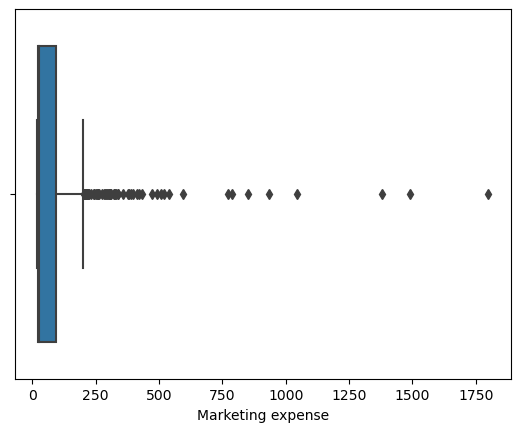

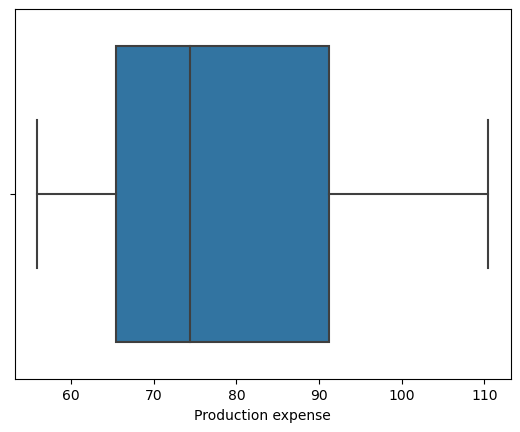

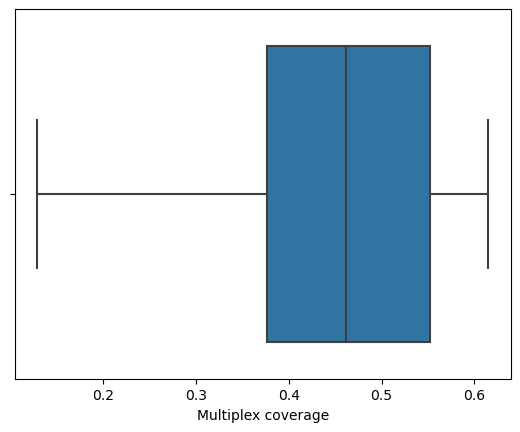

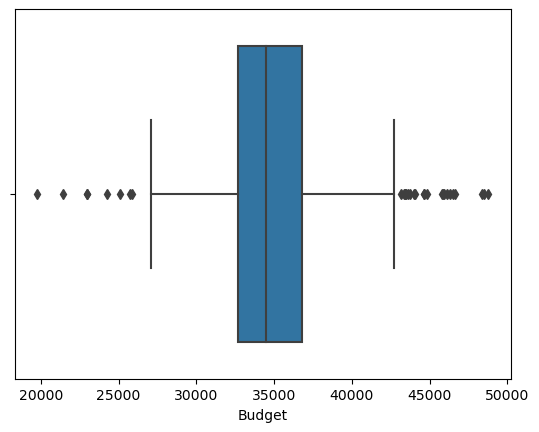

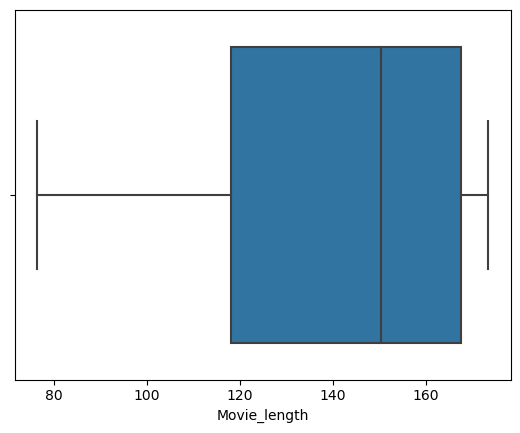

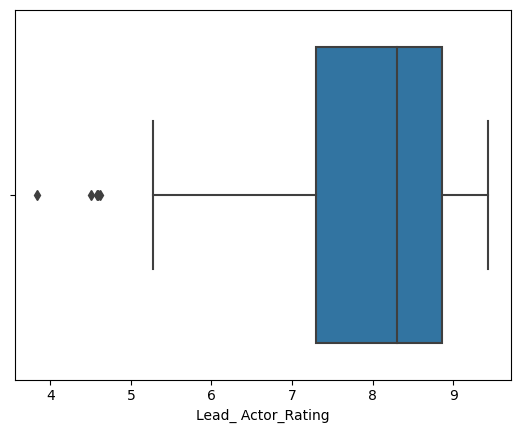

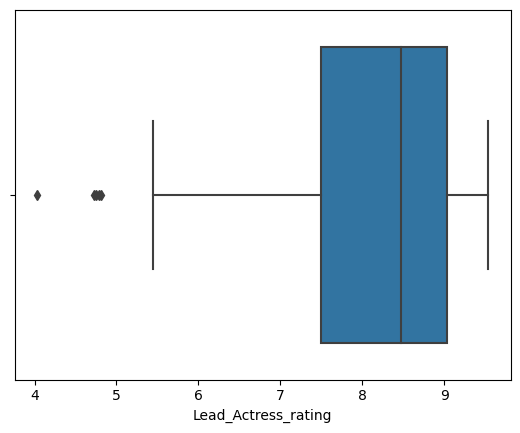

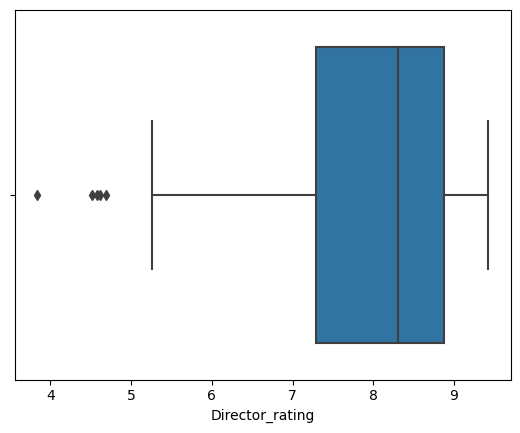

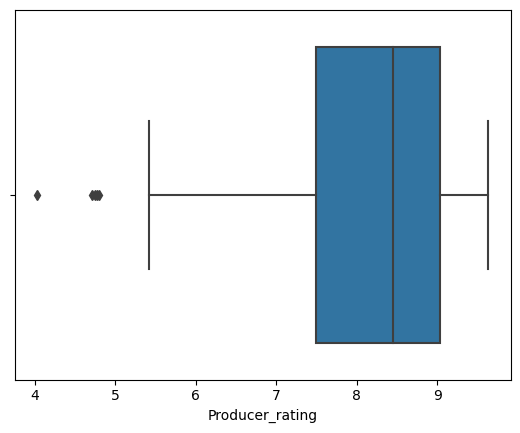

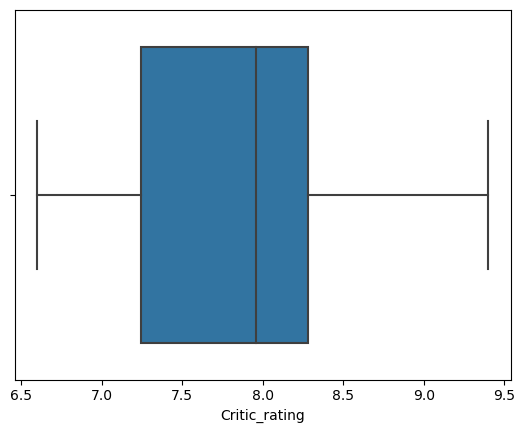

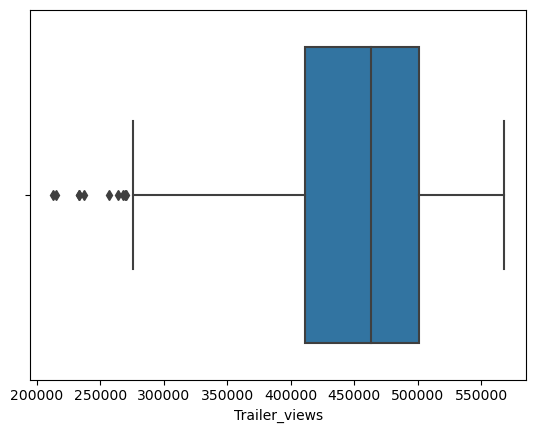

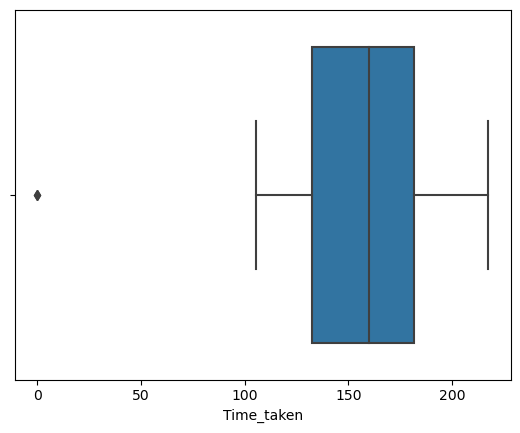

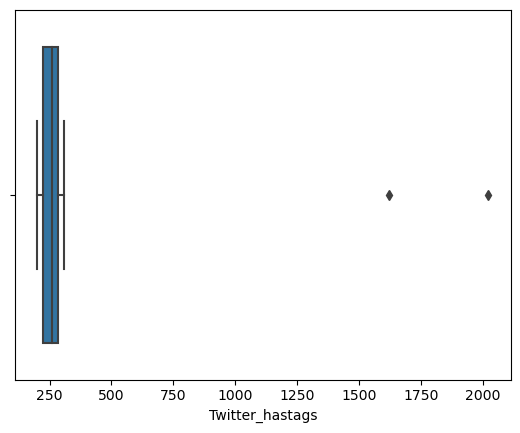

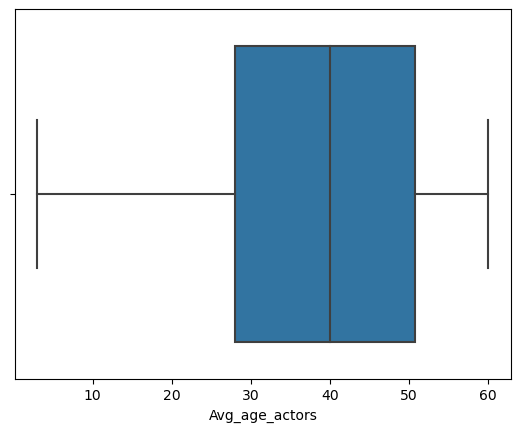

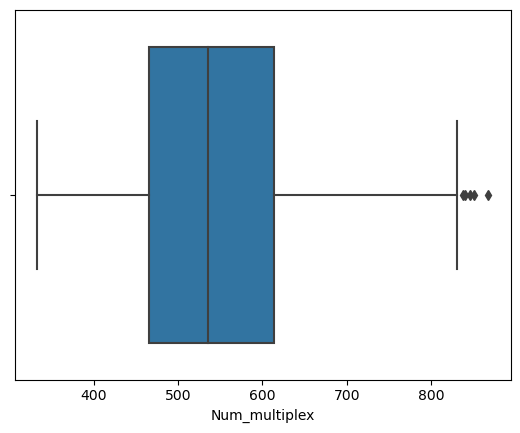

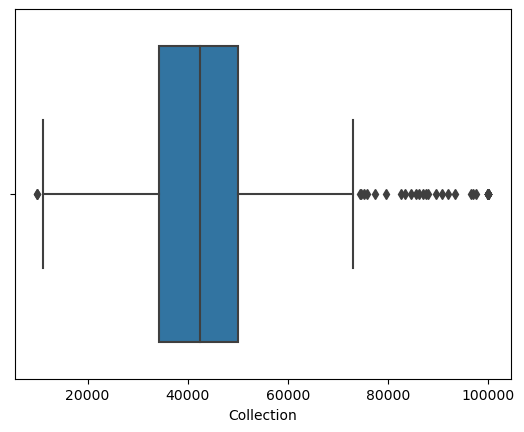

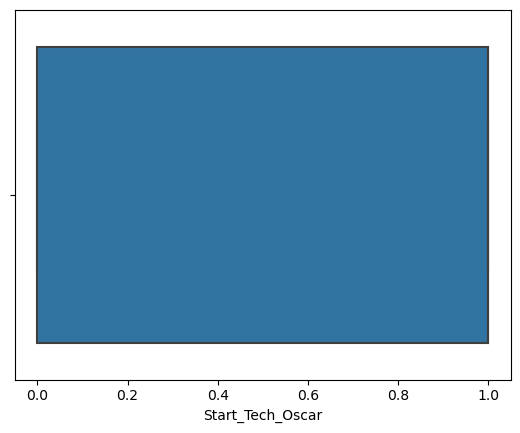

In [15]:
#EDA

import seaborn as sns
import matplotlib.pyplot as plt

for column in data.select_dtypes(include="number").columns:
    sns.boxplot(data=data, x=column)
    plt.show()

In [47]:
data.select_dtypes(include="number").columns

Index(['Marketing expense', 'Production expense', 'Multiplex coverage',
       'Budget', 'Movie_length', 'Lead_ Actor_Rating', 'Lead_Actress_rating',
       'Director_rating', 'Producer_rating', 'Critic_rating', 'Trailer_views',
       'Time_taken', 'Twitter_hastags', 'Avg_age_actors', 'Num_multiplex',
       'Collection', 'Start_Tech_Oscar'],
      dtype='object')

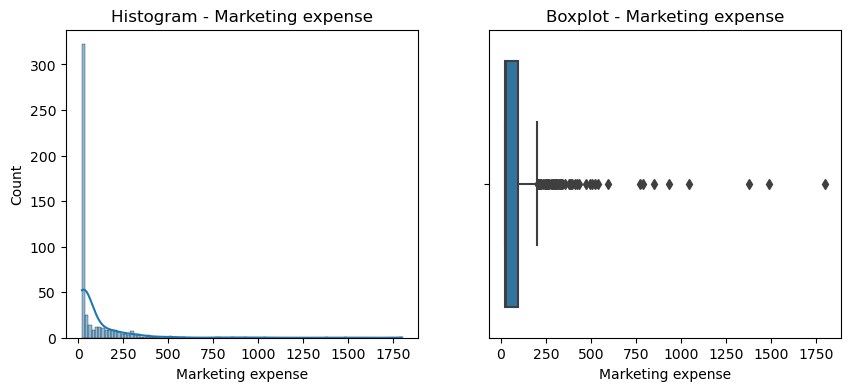

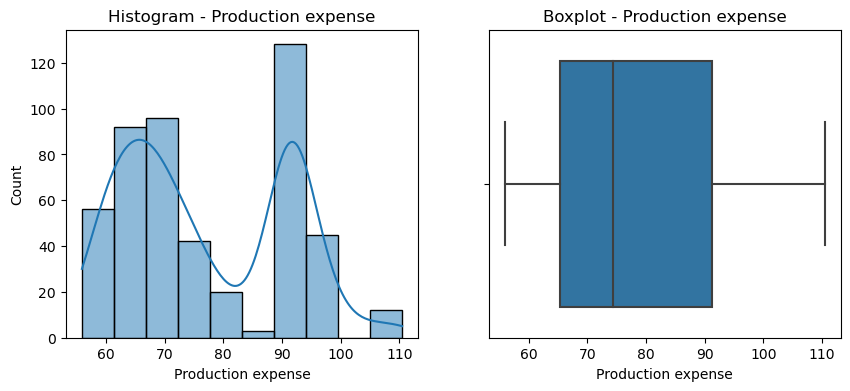

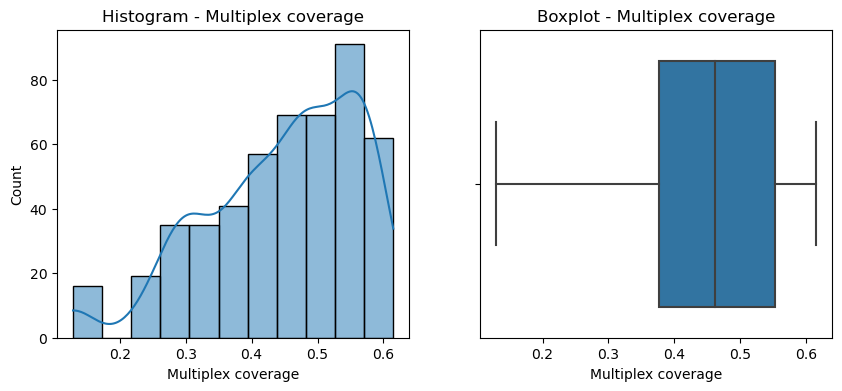

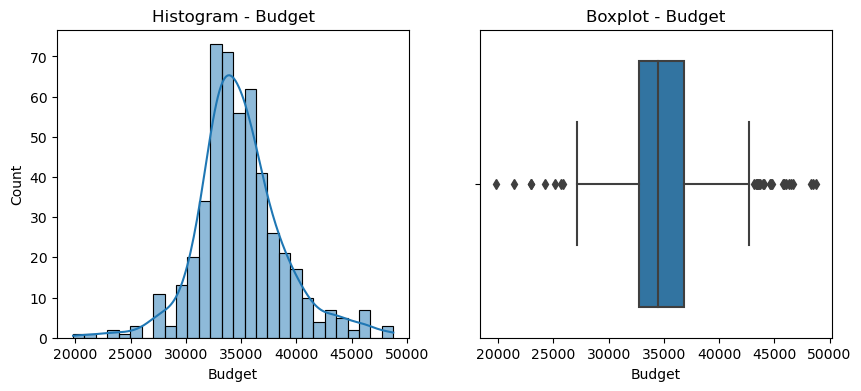

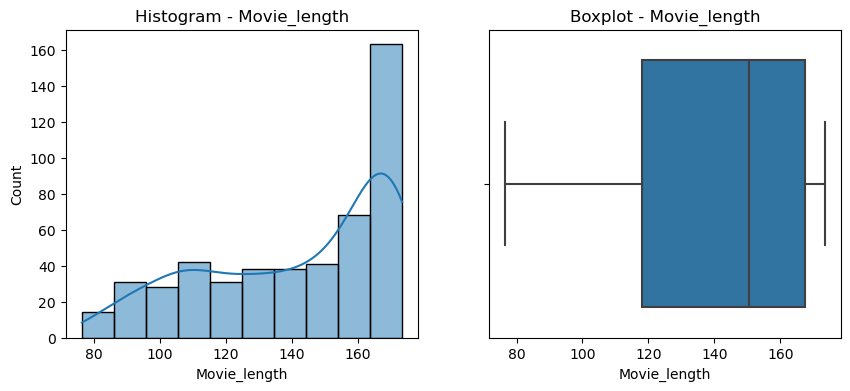

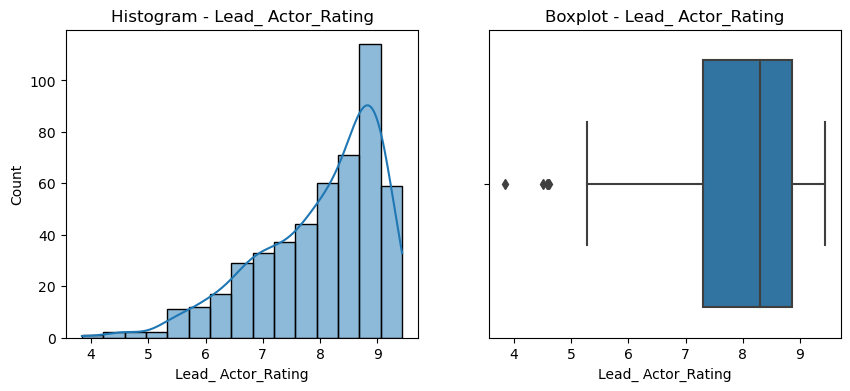

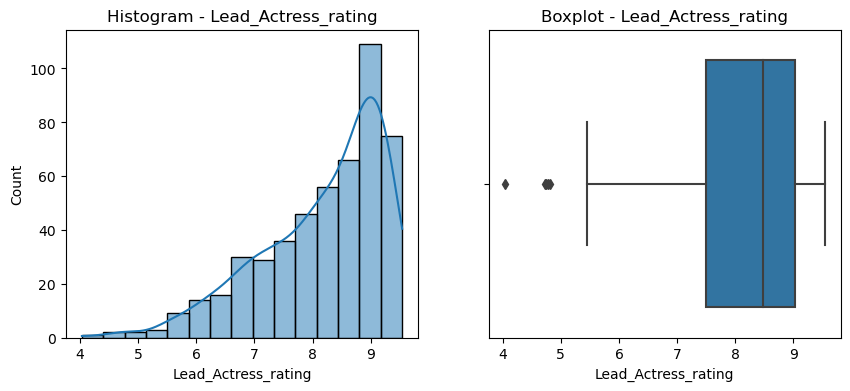

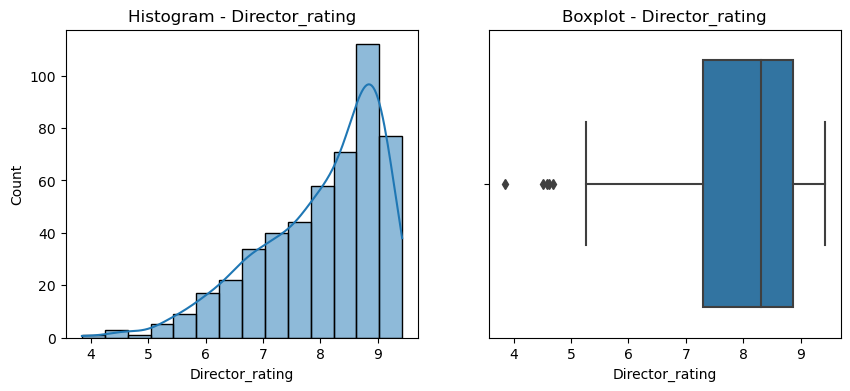

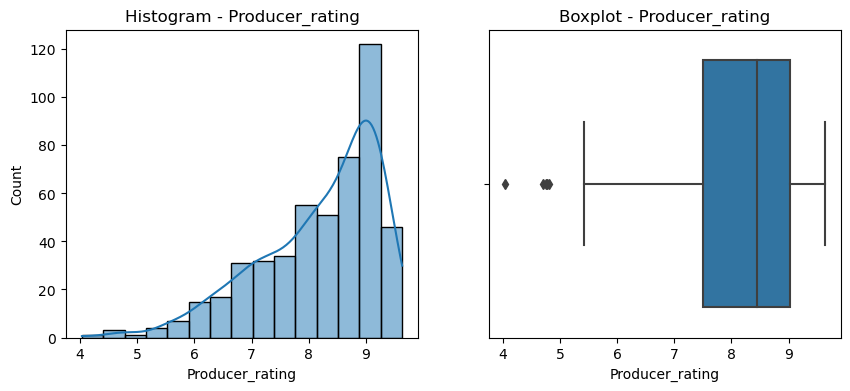

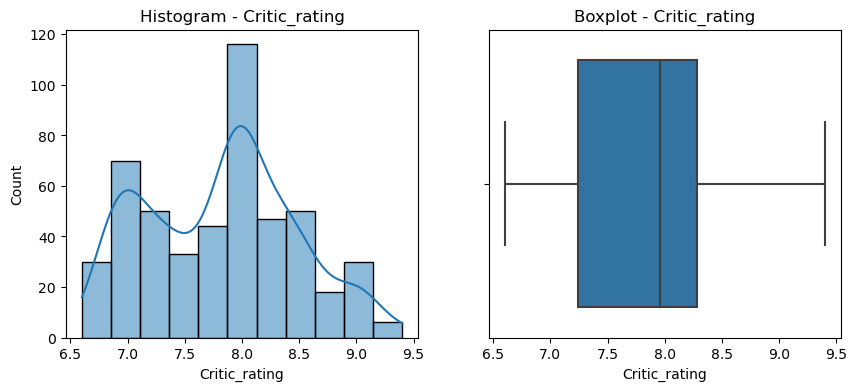

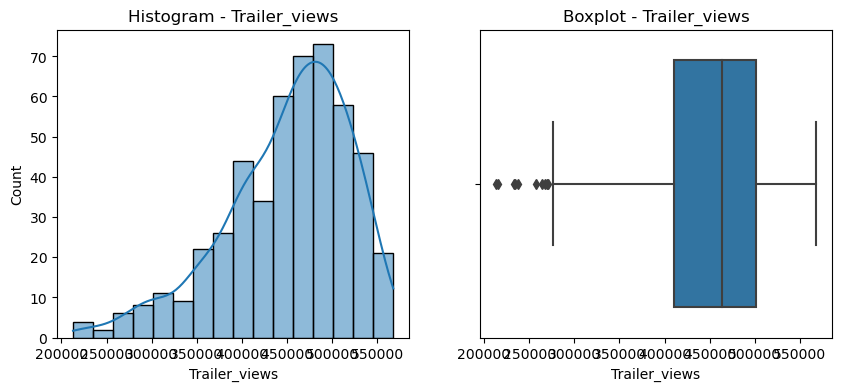

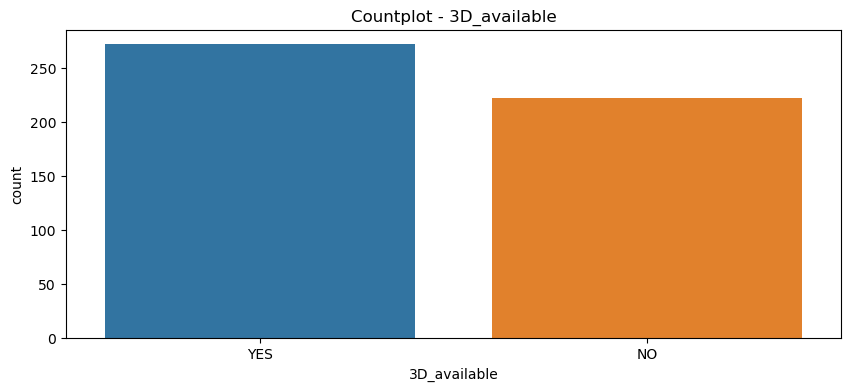

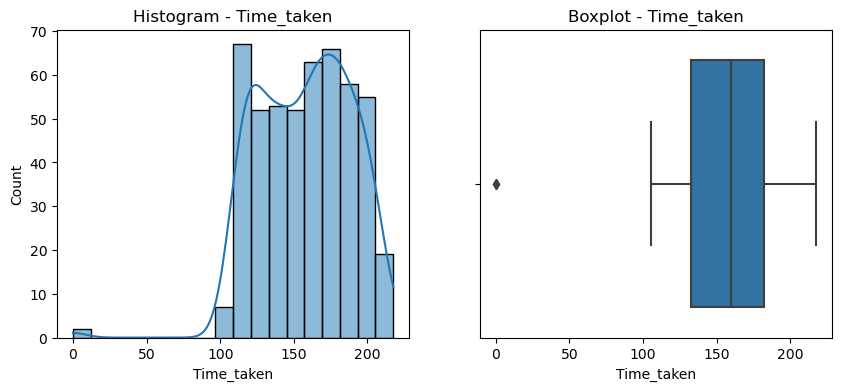

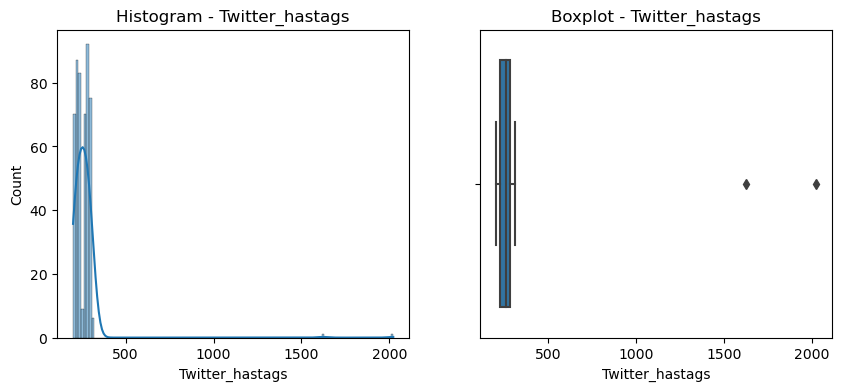

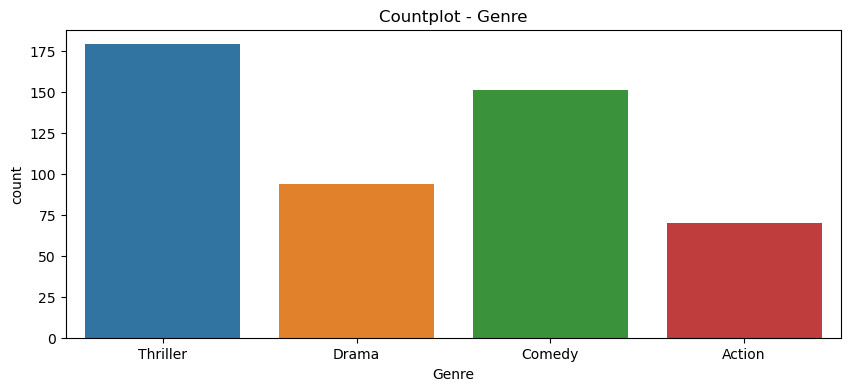

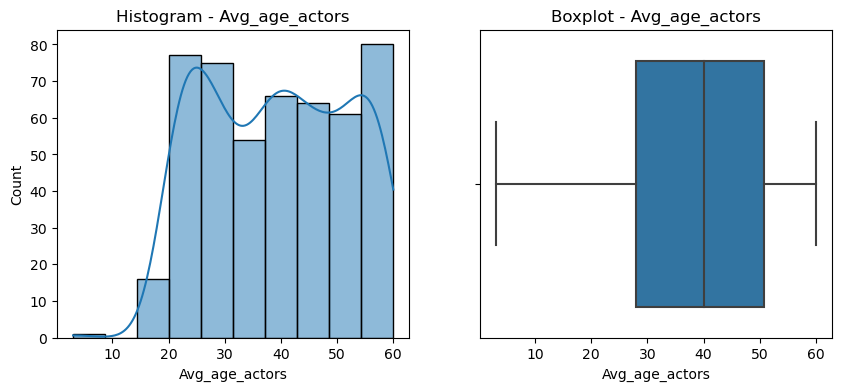

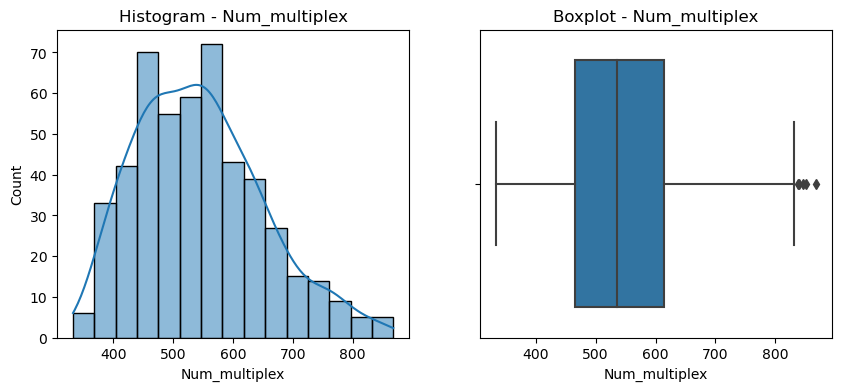

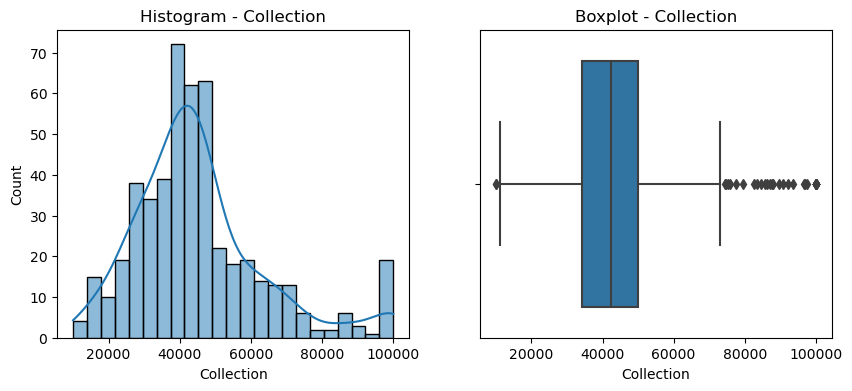

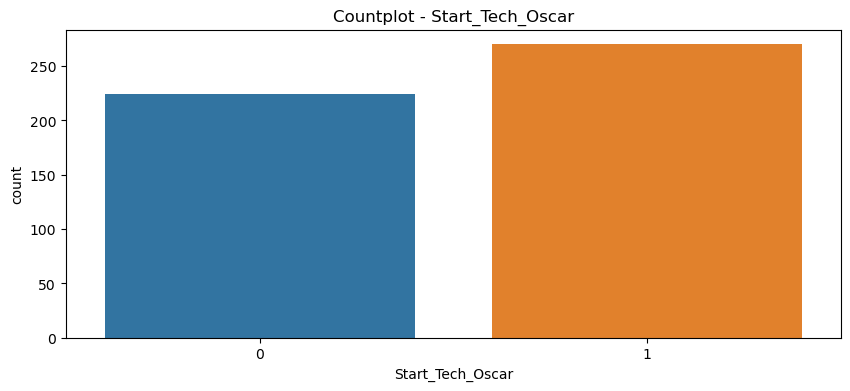

In [48]:
# Univariate Analysis

features = data.columns

def  univ_plot(data, feature, size=20):
    plt.figure(figsize=(10,4))
    
    if data[feature].nunique() > size:
        plt.subplot(1,2,1)
        sns.histplot(data=data, x=feature, kde=True)
        plt.title(f'Histogram - {feature}')

        plt.subplot(1,2,2)
        sns.boxplot(data=data, x=feature)
        plt.title(f'Boxplot - {feature}')
    else:
        sns.countplot(data=data, x=feature)
        plt.title(f'Countplot - {feature}')

    plt.show()

for feature in features:
    univ_plot(data, feature)

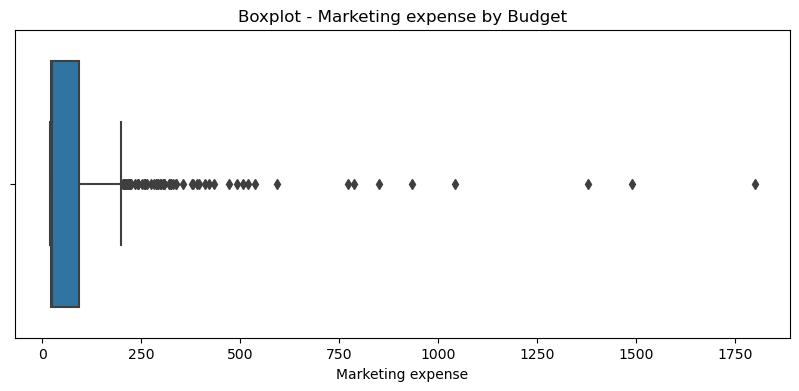

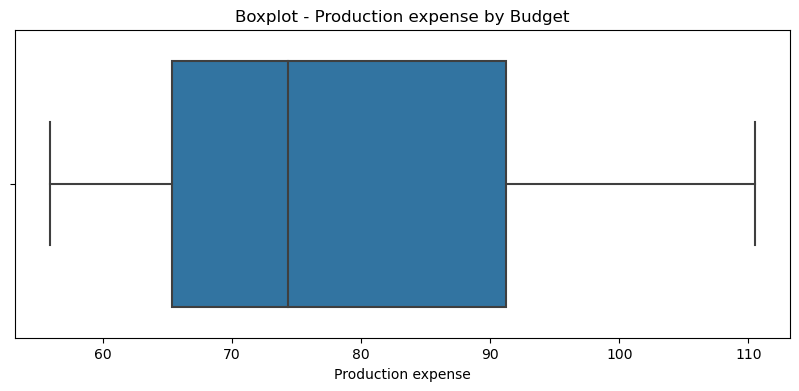

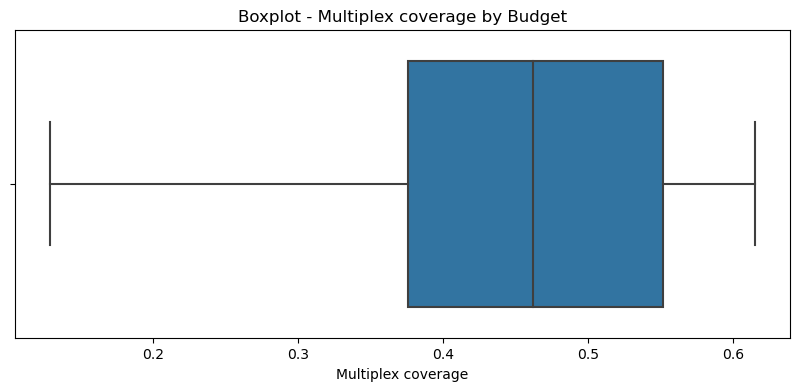

<Figure size 1000x400 with 0 Axes>

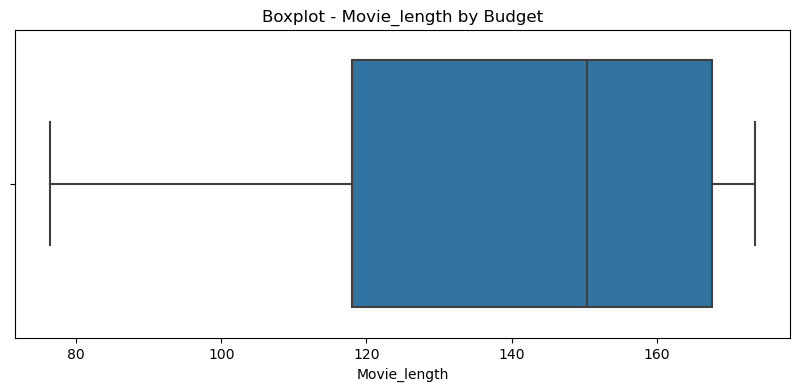

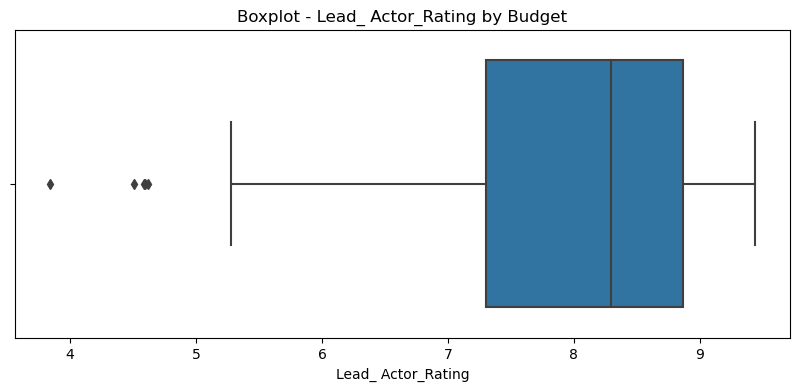

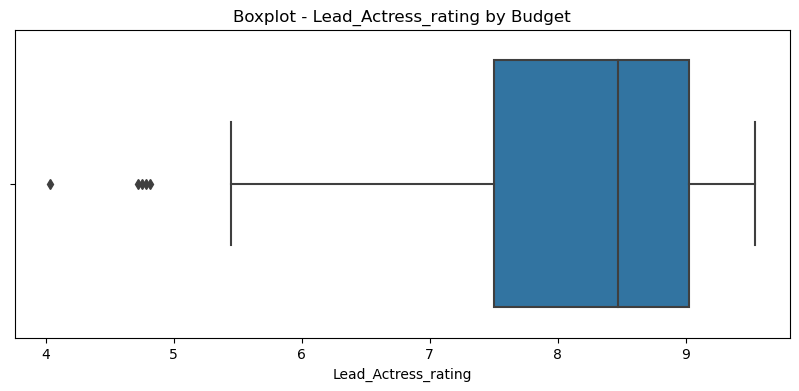

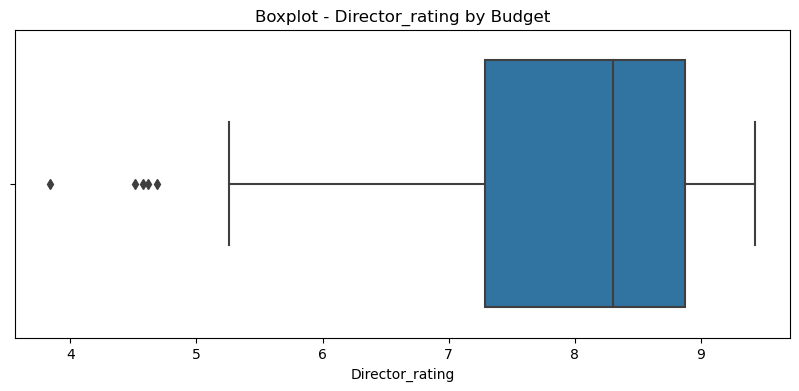

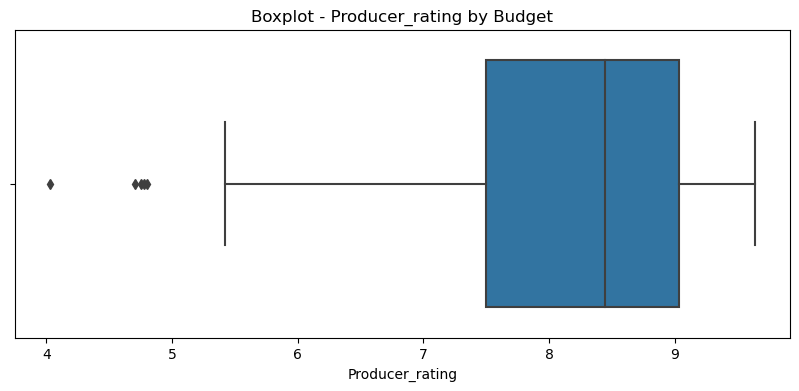

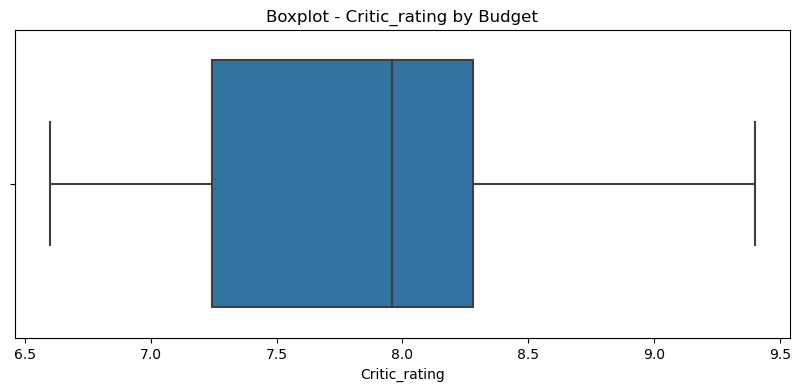

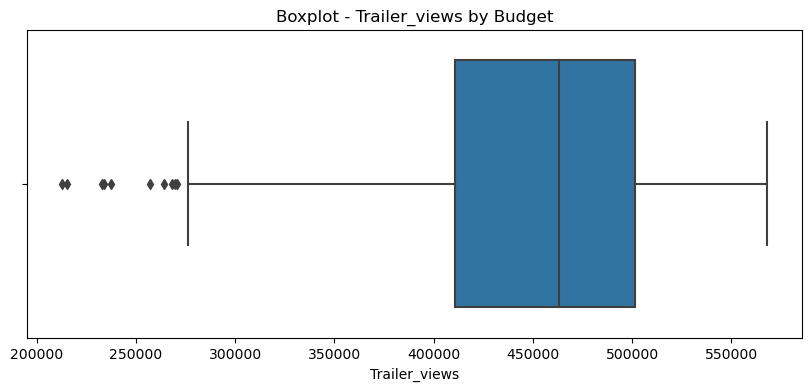

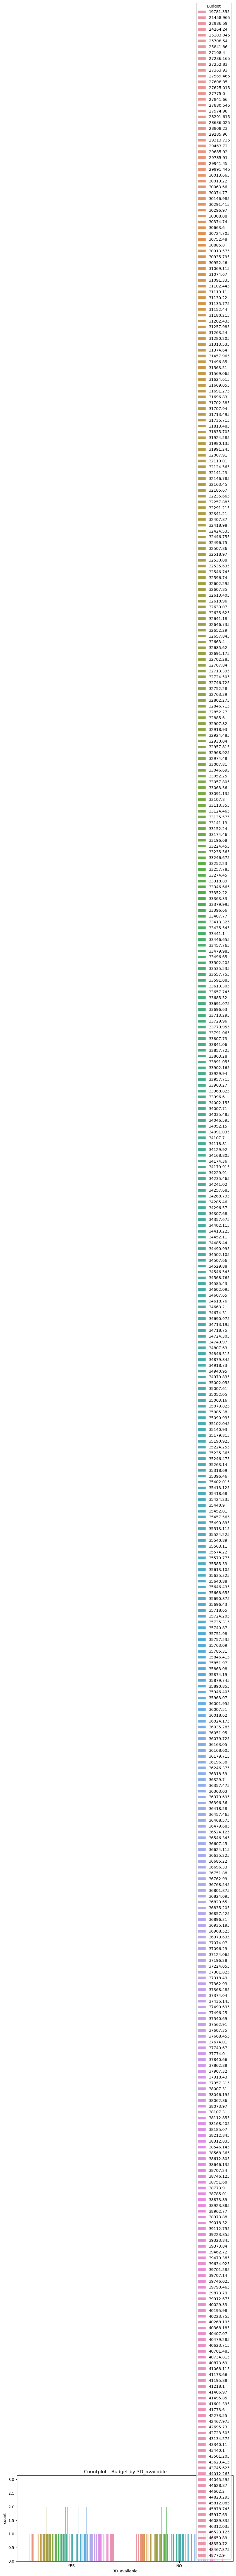

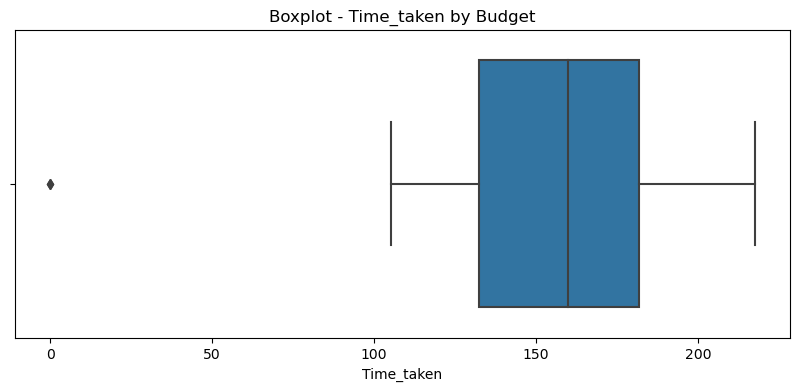

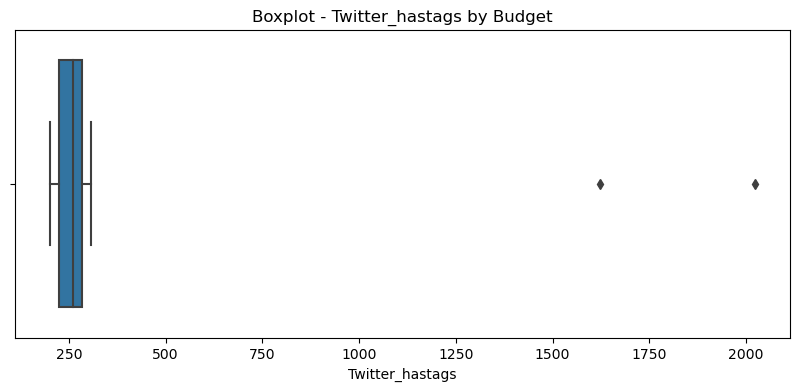

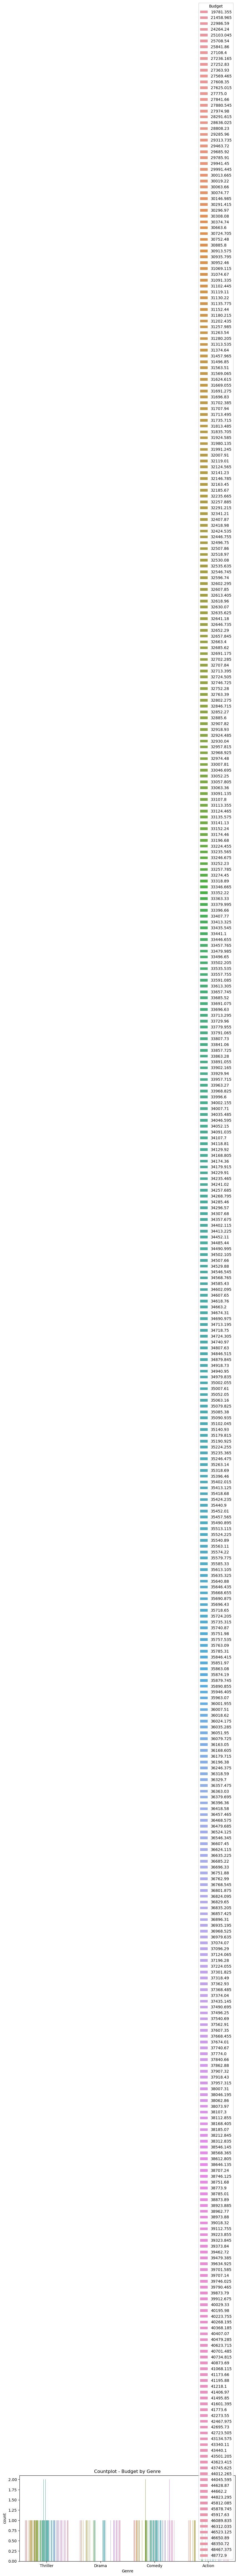

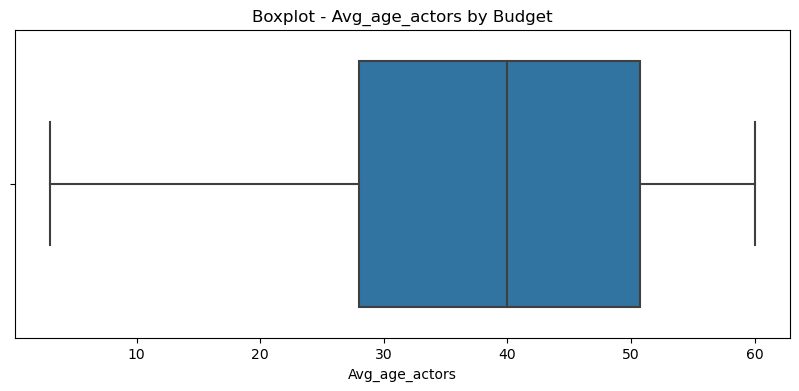

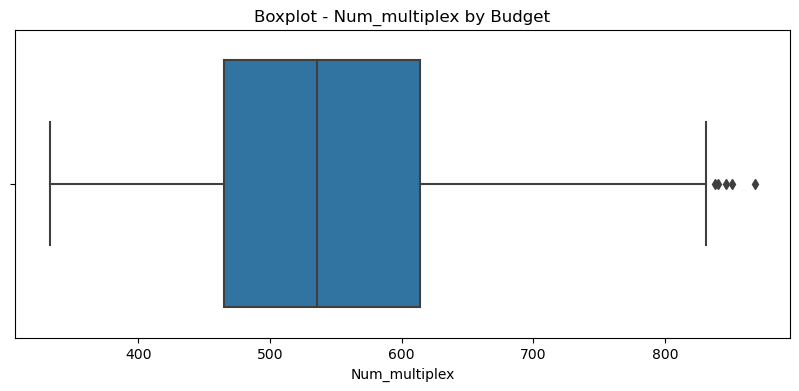

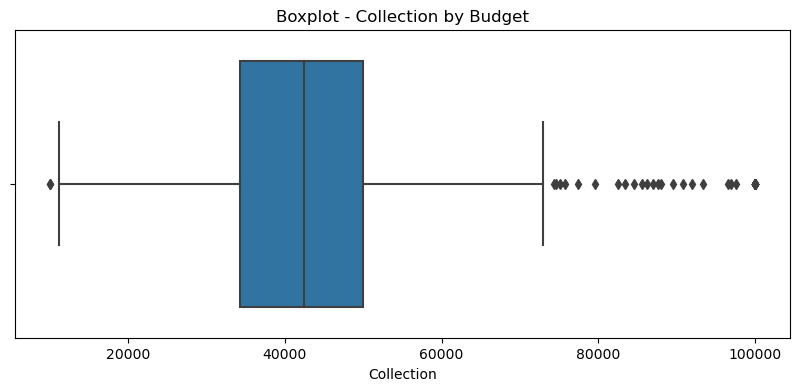

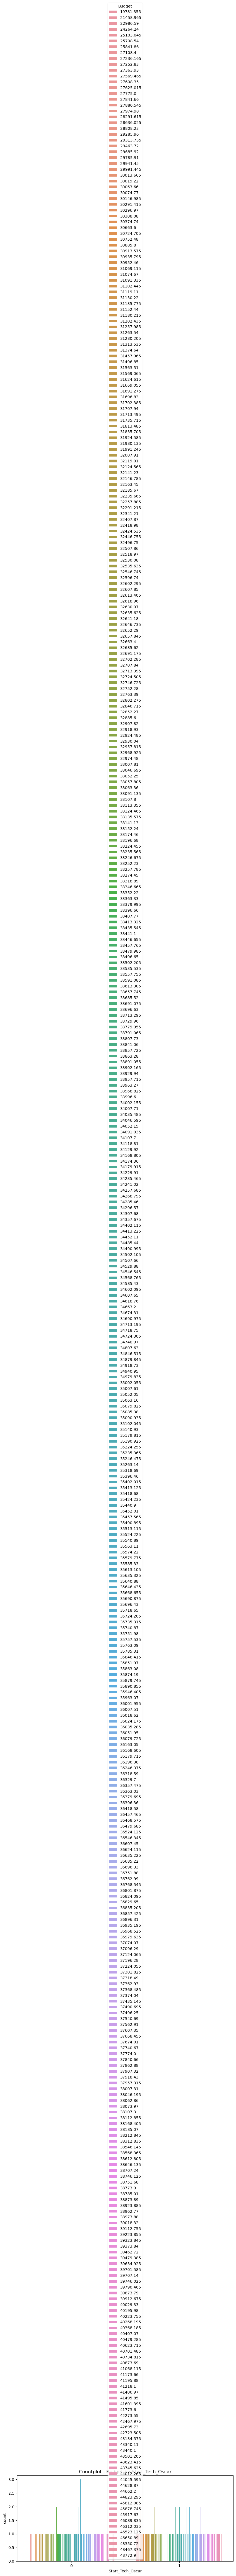

In [50]:
# Bivariate analysis
    
def biv_plot(data, feature, target='Budget', size=20):
    plt.figure(figsize=(10,4))
    
    if feature == target: return
    if data[feature].nunique() > size:
        sns.boxplot(data=data, x=feature, hue=target)
        plt.title(f'Boxplot - {feature} by {target}')
    else:
        sns.countplot(data=data, x=feature, hue=target)
        plt.title(f'Countplot - {target} by {feature}')

    plt.show()
    
for feature in features:
    biv_plot(data, feature)

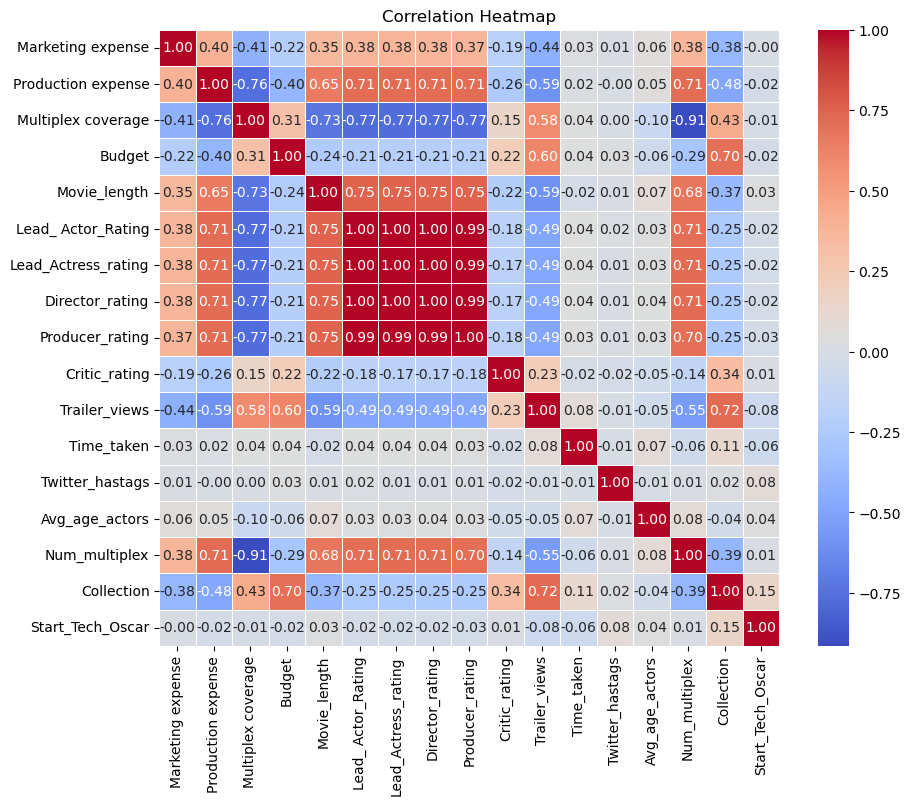

In [55]:
# Correlation

corr_matrix = data.select_dtypes(include='number').corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [56]:
# Preprocessing pipeline
data

Marketing expense  Production expense  Multiplex coverage     Budget  \
0              20.1264               59.62               0.462  36524.125   
1              20.5462               69.14               0.531  35668.655   
2              20.5458               69.14               0.531  39912.675   
3              20.6474               59.36               0.542  38873.890   
4              21.3810               59.36               0.542  39701.585   
..                 ...                 ...                 ...        ...   
501            21.2526               78.86               0.427  36624.115   
502            20.9054               78.86               0.427  33996.600   
503            21.2152               78.86               0.427  38751.680   
504            22.1918               78.86               0.427  37740.670   
505            20.9482               78.86               0.427  33496.650   

     Movie_length  Lead_ Actor_Rating  Lead_Actress_rating  Director_rating  \
0           138.7               7.825                8.095            7.910   
1           152.4               7.505                7.650            7.440   
2           134.6               7.485                7.570            7.495   
3           119.3               6.895                7.035            6.920   
4           127.7               6.920                7.070            6.815   
..            ...                 ...                  ...              ...   
501         142.6               8.680                8.775            8.620   
502         150.2               8.780                8.945            8.770   
503         164.5               8.830                8.970            8.855   
504         162.8               8.730                8.845            8.800   
505         154.3               8.640                8.880            8.680   

     Producer_rating  Critic_rating  Trailer_views 3D_available  Time_taken  \
0              7.995           7.94         527367          YES      109.60   
1              7.470           7.44         494055           NO      146.64   
2              7.515           7.44         547051           NO      147.88   
3              7.020           8.26         516279          YES      185.36   
4              7.070           8.26         531448           NO      176.48   
..               ...            ...            ...          ...         ...   
501            8.970           6.80         492480           NO      186.96   
502            8.930           7.80         482875          YES      132.24   
503            9.010           7.80         532239           NO      109.56   
504            8.845           6.80         496077          YES      158.80   
505            8.790           6.80         518438          YES      205.60   

     Twitter_hastags     Genre  Avg_age_actors  Num_multiplex  Collection  \
0            223.840  Thriller              23            494       48000   
1            243.456     Drama              42            462       43200   
2           2022.400    Comedy              38            458       69400   
3            225.344     Drama              45            472       66800   
4            225.792     Drama              55            395       72400   
..               ...       ...             ...            ...         ...   
501          243.584    Action              27            561       44800   
502          263.296    Action              20            600       41200   
503          243.824    Comedy              31            576       47800   
504          303.520    Comedy              47            607       44000   
505          203.040    Comedy              45            604       38000   

     Start_Tech_Oscar  
0                   1  
1                   0  
2                   1  
3                   1  
4                   1  
..                ...  
501                 0  
502                 0  
503                 0  
504              

In [16]:
feature_columns = data.columns[:-1] 
target_column = data.columns[-1] 

In [17]:
x = data[feature_columns]
y = data[target_column]

In [18]:
categorical_features = x.select_dtypes(include=['object']).columns.tolist()
numerical_features = x.select_dtypes(exclude=['object']).columns.tolist()

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [37]:
model = Sequential()
input_dim = x_train.shape[1]
model.add(Dense(units=64, activation='tanh', input_dim=input_dim))
model.add(Dense(units=32, activation='tanh'))
model.add(Dense(units=16, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

In [38]:
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(x_train, y_train, epochs=1000, batch_size=30, validation_split=0.2)

Epoch 1/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4877 - loss: 0.7451 - val_accuracy: 0.4557 - val_loss: 0.7377
Epoch 2/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4939 - loss: 0.7243 - val_accuracy: 0.4810 - val_loss: 0.7308
Epoch 3/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4732 - loss: 0.7227 - val_accuracy: 0.5063 - val_loss: 0.7251
Epoch 4/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5103 - loss: 0.7092 - val_accuracy: 0.5063 - val_loss: 0.7206
Epoch 5/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5290 - loss: 0.7024 - val_accuracy: 0.5190 - val_loss: 0.7198
Epoch 6/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5555 - loss: 0.6949 - val_accuracy: 0.5190 - val_loss: 0.7158
Epoch 7/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5361 - loss: 0.7099 - val_accuracy: 0.5316 - val_loss: 0.7136
Epoch 8/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5429 - loss: 0.6926 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6565 - loss: 0.6067 - val_accuracy: 0.6203 - val_loss: 0.6555
Epoch 52/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6752 - loss: 0.6031 - val_accuracy: 0.6329 - val_loss: 0.6572
Epoch 53/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6834 - loss: 0.6026 - val_accuracy: 0.6582 - val_loss: 0.6532
Epoch 54/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6916 - loss: 0.5878 - val_accuracy: 0.6329 - val_loss: 0.6572
Epoch 55/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6756 - loss: 0.5951 - val_accuracy: 0.6456 - val_loss: 0.6516
Epoch 56/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6971 - loss: 0.5858 - val_accuracy: 0.6329 - val_loss: 0.6545
Epoch 57/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6508 - loss: 0.5957 - val_accuracy: 0.6329 - val_loss: 0.6530
Epoch 58/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6737 - loss: 0.5946 - val_accuracy: 0.6329 -

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7185 - loss: 0.5234 - val_accuracy: 0.6456 - val_loss: 0.6337
Epoch 102/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7352 - loss: 0.5398 - val_accuracy: 0.6456 - val_loss: 0.6320
Epoch 103/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7150 - loss: 0.5417 - val_accuracy: 0.6456 - val_loss: 0.6294
Epoch 104/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6810 - loss: 0.5535 - val_accuracy: 0.6456 - val_loss: 0.6366
Epoch 105/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7038 - loss: 0.5474 - val_accuracy: 0.6456 - val_loss: 0.6391
Epoch 106/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7085 - loss: 0.5304 - val_accuracy: 0.6456 - val_loss: 0.6275
Epoch 107/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7450 - loss: 0.5365 - val_accuracy: 0.6582 - val_loss: 0.6353
Epoch 108/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7296 - loss: 0.5283 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7388 - loss: 0.5398 - val_accuracy: 0.6709 - val_loss: 0.6264
Epoch 152/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7319 - loss: 0.5328 - val_accuracy: 0.6582 - val_loss: 0.6281
Epoch 153/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7600 - loss: 0.4925 - val_accuracy: 0.6582 - val_loss: 0.6318
Epoch 154/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7782 - loss: 0.4966 - val_accuracy: 0.6582 - val_loss: 0.6243
Epoch 155/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7419 - loss: 0.5334 - val_accuracy: 0.6582 - val_loss: 0.6311
Epoch 156/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7321 - loss: 0.5245 - val_accuracy: 0.6582 - val_loss: 0.6270
Epoch 157/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7108 - loss: 0.5263 - val_accuracy: 0.6456 - val_loss: 0.6251
Epoch 158/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7481 - loss: 0.5095 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7942 - loss: 0.4734 - val_accuracy: 0.6456 - val_loss: 0.6462
Epoch 202/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8006 - loss: 0.4634 - val_accuracy: 0.6456 - val_loss: 0.6327
Epoch 203/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8203 - loss: 0.4523 - val_accuracy: 0.6456 - val_loss: 0.6429
Epoch 204/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7727 - loss: 0.4798 - val_accuracy: 0.6329 - val_loss: 0.6363
Epoch 205/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7772 - loss: 0.4838 - val_accuracy: 0.6456 - val_loss: 0.6356
Epoch 206/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7492 - loss: 0.4758 - val_accuracy: 0.6456 - val_loss: 0.6389
Epoch 207/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7744 - loss: 0.4651 - val_accuracy: 0.6456 - val_loss: 0.6357
Epoch 208/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7973 - loss: 0.4601 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7996 - loss: 0.4493 - val_accuracy: 0.6582 - val_loss: 0.6517
Epoch 252/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7826 - loss: 0.4978 - val_accuracy: 0.6329 - val_loss: 0.6528
Epoch 253/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8257 - loss: 0.4296 - val_accuracy: 0.6582 - val_loss: 0.6460
Epoch 254/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8205 - loss: 0.4385 - val_accuracy: 0.6582 - val_loss: 0.6450
Epoch 255/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8031 - loss: 0.4348 - val_accuracy: 0.6203 - val_loss: 0.6623
Epoch 256/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8168 - loss: 0.4423 - val_accuracy: 0.6582 - val_loss: 0.6647
Epoch 257/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7997 - loss: 0.4535 - val_accuracy: 0.6456 - val_loss: 0.6574
Epoch 258/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8133 - loss: 0.4297 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8384 - loss: 0.3950 - val_accuracy: 0.6203 - val_loss: 0.6710
Epoch 302/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8456 - loss: 0.4018 - val_accuracy: 0.6203 - val_loss: 0.6924
Epoch 303/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8401 - loss: 0.4069 - val_accuracy: 0.6076 - val_loss: 0.6855
Epoch 304/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8217 - loss: 0.4049 - val_accuracy: 0.6203 - val_loss: 0.6665
Epoch 305/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8678 - loss: 0.3749 - val_accuracy: 0.6203 - val_loss: 0.6579
Epoch 306/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8390 - loss: 0.3974 - val_accuracy: 0.6203 - val_loss: 0.6681
Epoch 307/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8647 - loss: 0.3893 - val_accuracy: 0.6329 - val_loss: 0.6874
Epoch 308/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8335 - loss: 0.4113 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8702 - loss: 0.3347 - val_accuracy: 0.6203 - val_loss: 0.7305
Epoch 352/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8596 - loss: 0.3269 - val_accuracy: 0.6329 - val_loss: 0.7632
Epoch 353/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8888 - loss: 0.3135 - val_accuracy: 0.5949 - val_loss: 0.6976
Epoch 354/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8843 - loss: 0.3525 - val_accuracy: 0.6076 - val_loss: 0.7107
Epoch 355/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8637 - loss: 0.3429 - val_accuracy: 0.6203 - val_loss: 0.6914
Epoch 356/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8493 - loss: 0.3677 - val_accuracy: 0.6203 - val_loss: 0.7286
Epoch 357/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8929 - loss: 0.3259 - val_accuracy: 0.5949 - val_loss: 0.7143
Epoch 358/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8648 - loss: 0.3352 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8845 - loss: 0.2847 - val_accuracy: 0.6203 - val_loss: 0.7870
Epoch 402/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8921 - loss: 0.3058 - val_accuracy: 0.6329 - val_loss: 0.7575
Epoch 403/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9055 - loss: 0.2795 - val_accuracy: 0.6203 - val_loss: 0.7715
Epoch 404/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9131 - loss: 0.2584 - val_accuracy: 0.6203 - val_loss: 0.8028
Epoch 405/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8951 - loss: 0.3161 - val_accuracy: 0.6203 - val_loss: 0.7737
Epoch 406/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9087 - loss: 0.2736 - val_accuracy: 0.6076 - val_loss: 0.7741
Epoch 407/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9200 - loss: 0.2616 - val_accuracy: 0.6203 - val_loss: 0.7905
Epoch 408/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9220 - loss: 0.2721 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9597 - loss: 0.2136 - val_accuracy: 0.6709 - val_loss: 0.8691
Epoch 452/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9521 - loss: 0.2100 - val_accuracy: 0.6203 - val_loss: 0.8585
Epoch 453/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.2162 - val_accuracy: 0.6456 - val_loss: 0.8432
Epoch 454/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9406 - loss: 0.2080 - val_accuracy: 0.6582 - val_loss: 0.8867
Epoch 455/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9357 - loss: 0.2245 - val_accuracy: 0.6456 - val_loss: 0.8613
Epoch 456/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9535 - loss: 0.2133 - val_accuracy: 0.6456 - val_loss: 0.8828
Epoch 457/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9519 - loss: 0.2047 - val_accuracy: 0.6329 - val_loss: 0.8682
Epoch 458/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9446 - loss: 0.2109 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9748 - loss: 0.1546 - val_accuracy: 0.6076 - val_loss: 0.9621
Epoch 502/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9889 - loss: 0.1521 - val_accuracy: 0.6456 - val_loss: 1.0187
Epoch 503/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9831 - loss: 0.1538 - val_accuracy: 0.6709 - val_loss: 1.0506
Epoch 504/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9788 - loss: 0.1628 - val_accuracy: 0.6203 - val_loss: 1.0052
Epoch 505/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9654 - loss: 0.1596 - val_accuracy: 0.6456 - val_loss: 0.9985
Epoch 506/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9809 - loss: 0.1667 - val_accuracy: 0.6329 - val_loss: 1.0019
Epoch 507/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9745 - loss: 0.1623 - val_accuracy: 0.6709 - val_loss: 1.0334
Epoch 508/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9789 - loss: 0.1424 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9956 - loss: 0.1078 - val_accuracy: 0.6329 - val_loss: 1.1444
Epoch 552/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9838 - loss: 0.1109 - val_accuracy: 0.6076 - val_loss: 1.1404
Epoch 553/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9868 - loss: 0.1054 - val_accuracy: 0.6456 - val_loss: 1.1633
Epoch 554/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9971 - loss: 0.1120 - val_accuracy: 0.6582 - val_loss: 1.1817
Epoch 555/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9959 - loss: 0.1177 - val_accuracy: 0.6456 - val_loss: 1.1816
Epoch 556/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9847 - loss: 0.1126 - val_accuracy: 0.6582 - val_loss: 1.2048
Epoch 557/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9966 - loss: 0.1001 - val_accuracy: 0.6456 - val_loss: 1.1802
Epoch 558/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9910 - loss: 0.1066 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9964 - loss: 0.0786 - val_accuracy: 0.6456 - val_loss: 1.3666
Epoch 602/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9963 - loss: 0.0786 - val_accuracy: 0.6456 - val_loss: 1.3858
Epoch 603/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9879 - loss: 0.0813 - val_accuracy: 0.6582 - val_loss: 1.3649
Epoch 604/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9955 - loss: 0.0808 - val_accuracy: 0.6456 - val_loss: 1.3244
Epoch 605/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9964 - loss: 0.0742 - val_accuracy: 0.6456 - val_loss: 1.3583
Epoch 606/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9995 - loss: 0.0702 - val_accuracy: 0.6076 - val_loss: 1.3042
Epoch 607/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9895 - loss: 0.0866 - val_accuracy: 0.6456 - val_loss: 1.3375
Epoch 608/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9989 - loss: 0.0754 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0505 - val_accuracy: 0.6582 - val_loss: 1.5298
Epoch 652/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9989 - loss: 0.0492 - val_accuracy: 0.6329 - val_loss: 1.5178
Epoch 653/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0578 - val_accuracy: 0.6582 - val_loss: 1.4744
Epoch 654/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9985 - loss: 0.0510 - val_accuracy: 0.6582 - val_loss: 1.5016
Epoch 655/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0521 - val_accuracy: 0.6456 - val_loss: 1.4879
Epoch 656/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0500 - val_accuracy: 0.6582 - val_loss: 1.4895
Epoch 657/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0472 - val_accuracy: 0.6582 - val_loss: 1.5201
Epoch 658/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9981 - loss: 0.0536 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0409 - val_accuracy: 0.6582 - val_loss: 1.6087
Epoch 702/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0344 - val_accuracy: 0.6456 - val_loss: 1.6233
Epoch 703/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0377 - val_accuracy: 0.6456 - val_loss: 1.6107
Epoch 704/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0353 - val_accuracy: 0.6456 - val_loss: 1.6351
Epoch 705/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0359 - val_accuracy: 0.6582 - val_loss: 1.6246
Epoch 706/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0356 - val_accuracy: 0.6076 - val_loss: 1.6002
Epoch 707/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0345 - val_accuracy: 0.6456 - val_loss: 1.6772
Epoch 708/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0383 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0250 - val_accuracy: 0.6456 - val_loss: 1.7419
Epoch 752/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0266 - val_accuracy: 0.6456 - val_loss: 1.7144
Epoch 753/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0272 - val_accuracy: 0.6456 - val_loss: 1.7501
Epoch 754/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 0.6329 - val_loss: 1.7923
Epoch 755/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0308 - val_accuracy: 0.6456 - val_loss: 1.7499
Epoch 756/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 0.6329 - val_loss: 1.7199
Epoch 757/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 0.6456 - val_loss: 1.7571
Epoch 758/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0254 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0233 - val_accuracy: 0.6456 - val_loss: 1.8326
Epoch 802/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0217 - val_accuracy: 0.6456 - val_loss: 1.8589
Epoch 803/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0223 - val_accuracy: 0.6456 - val_loss: 1.8435
Epoch 804/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0227 - val_accuracy: 0.6456 - val_loss: 1.8608
Epoch 805/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0185 - val_accuracy: 0.6456 - val_loss: 1.8112
Epoch 806/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0226 - val_accuracy: 0.6456 - val_loss: 1.8379
Epoch 807/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0204 - val_accuracy: 0.6456 - val_loss: 1.8331
Epoch 808/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0177 - val_accuracy: 0.6456 - val_loss: 1.9090
Epoch 852/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0153 - val_accuracy: 0.6456 - val_loss: 1.9153
Epoch 853/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0148 - val_accuracy: 0.6456 - val_loss: 1.9161
Epoch 854/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 0.6456 - val_loss: 1.9413
Epoch 855/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0167 - val_accuracy: 0.6456 - val_loss: 1.9181
Epoch 856/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0164 - val_accuracy: 0.6456 - val_loss: 1.9209
Epoch 857/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0152 - val_accuracy: 0.6456 - val_loss: 1.9238
Epoch 858/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0159 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0128 - val_accuracy: 0.6456 - val_loss: 1.9764
Epoch 902/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0120 - val_accuracy: 0.6456 - val_loss: 1.9900
Epoch 903/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0126 - val_accuracy: 0.6456 - val_loss: 1.9690
Epoch 904/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 0.6456 - val_loss: 1.9807
Epoch 905/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 0.6456 - val_loss: 1.9837
Epoch 906/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0124 - val_accuracy: 0.6329 - val_loss: 2.0120
Epoch 907/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0147 - val_accuracy: 0.6456 - val_loss: 1.9910
Epoch 908/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0129 - val_accuracy: 0

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0111 - val_accuracy: 0.6329 - val_loss: 2.0459
Epoch 952/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0117 - val_accuracy: 0.6456 - val_loss: 2.0410
Epoch 953/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.6456 - val_loss: 2.0449
Epoch 954/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0.6456 - val_loss: 2.0431
Epoch 955/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0100 - val_accuracy: 0.6456 - val_loss: 2.0379
Epoch 956/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0099 - val_accuracy: 0.6329 - val_loss: 2.0592
Epoch 957/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0096 - val_accuracy: 0.6456 - val_loss: 2.0425
Epoch 958/1000
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0104 - val_accuracy: 0

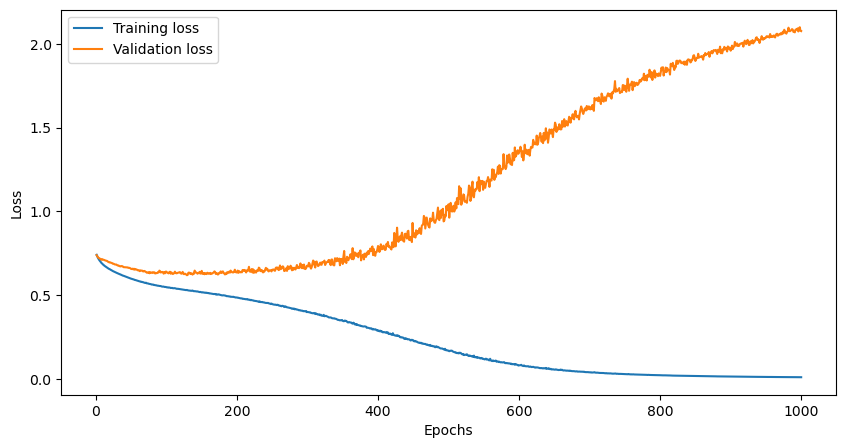

In [40]:
epochs = len(history.history['loss'])
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs + 1), history.history['loss'], label="Training loss")
plt.plot(range(1, epochs + 1), history.history['val_loss'], label="Validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
y_pred = np.where(model.predict(x_test)>0.5,1,0).flatten()

f1_score(y_test, y_pred)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


0.6481481481481481

In [45]:
accuracy_score(y_test, y_pred)


0.6161616161616161